In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import spacy
import gensim

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('resume.csv')
df = df.dropna(subset=['Resume_str'])

In [23]:
data = df.Resume_str.values.tolist()
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [re.sub(r"\'", "", sent) for sent in data]
data = [re.sub('\w*\d\w*', ' ', sent) for sent in data]

In [4]:
data_words = []
for sentence in data:
    word = gensim.utils.simple_preprocess(str(sentence), deacc=True)
    data_words.append(word)

In [5]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [6]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB'])

In [7]:
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [8]:
lda_model = LatentDirichletAllocation(n_components=20, random_state=20)
lda_model.fit(data_vectorized)
lda_output = lda_model.fit_transform(data_vectorized)

In [9]:
print("Log Likelihood: ", lda_model.score(data_vectorized))
print("Perplexity: ", lda_model.perplexity(data_vectorized))
lda_model.get_params()

Log Likelihood:  -5338538.2732605105
Perplexity:  906.1174820788403


{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 20,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [22]:
vis_data = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)
pyLDAvis.display(vis_data)
# pyLDAvis.save_html(vis_data, 'lda.html')

In [11]:
topics_dict = {}
for topic_idx, topic in enumerate(lda_model.components_):
    topics_dict["Topic"+str(topic_idx)] = [vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]]

In [14]:
topics_to_df = pd.DataFrame(topics_dict).T
topics_to_df

,0,1,2,3,4,5,6,7,8,9
Topic0,leadership,budget,result,increase,performance,strategy,planning,analysis,implementation,cost
Topic1,aviation,security,aircraft,officer,personnel,maintenance,flight,course,air,army
Topic2,fitness,coach,health,exercise,group,trainer,sport,class,certify,wellness
Topic3,record,file,phone,issue,document,order,answer,resolve,telephone,problem
Topic4,student,school,teacher,child,classroom,art,activity,parent,teach,learn
Topic5,quality,test,testing,analysis,production,improvement,datum,requirement,control,assurance
Topic6,network,server,technology,software,security,hardware,window,computer,user,troubleshoot
Topic7,design,event,marketing,relation,medium,production,press,material,write,director
Topic8,construction,safety,site,material,schedule,contractor,design,building,budget,contract
Topic9,employee,resource,policy,hire,benefit,conduct,interview,recruitment,payroll,personnel


In [16]:
topics = ['Politics','Aviation','Fitness',
          'Services','Teacher','ProductControl',
          'IT','Finance','Construction','HR','Arts',
          'Developer','Engineerer','Accounting','Chefs',
          'Heathcare','Warehouse','Research',
          'Sales','Marketing']

topics_to_df["Topics"] = topics
topics_to_df

,0,1,2,3,4,5,6,7,8,9,Topics
Topic0,leadership,budget,result,increase,performance,strategy,planning,analysis,implementation,cost,Politics
Topic1,aviation,security,aircraft,officer,personnel,maintenance,flight,course,air,army,Aviation
Topic2,fitness,coach,health,exercise,group,trainer,sport,class,certify,wellness,Fitness
Topic3,record,file,phone,issue,document,order,answer,resolve,telephone,problem,Services
Topic4,student,school,teacher,child,classroom,art,activity,parent,teach,learn,Teacher
Topic5,quality,test,testing,analysis,production,improvement,datum,requirement,control,assurance,ProductControl
Topic6,network,server,technology,software,security,hardware,window,computer,user,troubleshoot,IT
Topic7,design,event,marketing,relation,medium,production,press,material,write,director,Finance
Topic8,construction,safety,site,material,schedule,contractor,design,building,budget,contract,Construction
Topic9,employee,resource,policy,hire,benefit,conduct,interview,recruitment,payroll,personnel,HR


In [24]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=20, random_state=20).fit_predict(lda_output)

svd_model = TruncatedSVD(n_components=2)
lda_output_svd = svd_model.fit_transform(lda_output)

x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

print("Weights:", np.round(svd_model.components_, 2))

print("Variance:", np.round(svd_model.explained_variance_ratio_, 2))

Weights: [[ 0.31  0.05  0.06  0.47  0.27  0.07  0.07  0.17  0.08  0.3   0.03  0.09
   0.03  0.55  0.32  0.12  0.08  0.06  0.17  0.09]
 [ 0.02 -0.01 -0.05 -0.16 -0.29 -0.   -0.02 -0.11 -0.03 -0.07 -0.03  0.
  -0.01  0.73 -0.58 -0.07 -0.03 -0.03 -0.01 -0.03]]
Variance: [0.04 0.13]


Text(0.5, 1.0, 'SVD of Topic Clusters')

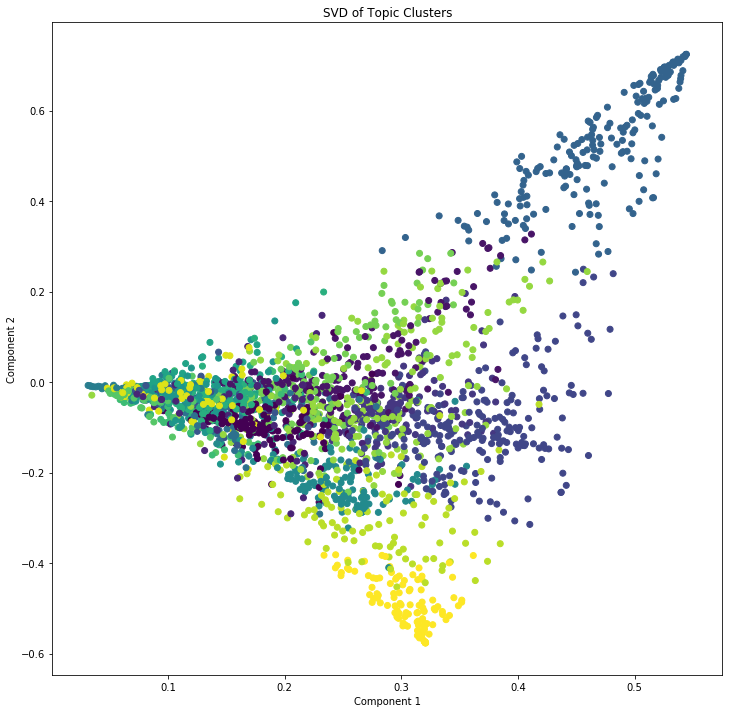

In [25]:
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("SVD of Topic Clusters", )

In [96]:
topic_names = ['Topic' + str(i) for i in range(lda_model.n_components)]
topic_keywords = pd.DataFrame(lda_model.components_)
topic_keywords.columns = vectorizer.get_feature_names()
topic_keywords.index = topic_names

keywords = np.array(vectorizer.get_feature_names())
topic_keywords = []
for topic_weights in lda_model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:10]
    topic_keywords.append(keywords.take(top_keyword_locs))
                             
topic_keywords = pd.DataFrame(topic_keywords)
topic_keywords.columns = ['Word '+str(i) for i in range(topic_keywords.shape[1])]
topic_keywords.index = ['Topic '+str(i) for i in range(topic_keywords.shape[0])]

topic_keywords["Topics"]=topics

In [97]:
nlp = spacy.load('en_core_web_sm')

def predict_topic(text, nlp=nlp):
    
    words = []
    for sentence in text:
        word = gensim.utils.simple_preprocess(str(sentence), deacc=True)
        words.append(word)
    
    lemm = lemmatization(words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    vector = vectorizer.transform(lemm)
    
    topic_scores = lda_model.transform(vector)
    topic = topic_keywords.iloc[np.argmax(topic_scores), 1:14].values.tolist()
    
    infer_topic = topic_keywords.iloc[np.argmax(topic_scores), -1]
    
    return infer_topic, topic, topic_scores

In [98]:
mytext = [["Managing schedules for interviews and deep search for potential worker."],
         ["Head chef for 8 years and cook over 100 dishes a day under fast paced environment."],
         ["Developing software on daily bases with tight deadlines weekly."],
         ["Objective : Competent, compassionate, and empathetic Staff Nurse with background experience in mental health. Meets responsibility in patient safety, medication safety, coordination of care, and prioritization. Works well under pressure, persistent, determined, and goal oriented. Emotional stability to cope with human suffering, emergencies and other stresses. Offering leadership qualities with a positive attitude. Motivated, hardworking, organized, focused and dedicated. To embrace a career opportunity where my healthcare background and education would be conducive to achieving all goals."]]

for text in mytext:
    infer_topic, topic, prob_scores = predict_topic(text)

    print("------------")
    print(topic)
    print(infer_topic)

------------
['resource', 'policy', 'hire', 'benefit', 'conduct', 'interview', 'recruitment', 'payroll', 'personnel', 'HR']
HR
------------
['store', 'chef', 'kitchen', 'cash', 'item', 'menu', 'merchandise', 'inventory', 'guest', 'Chefs']
Chefs
------------
['accounting', 'prepare', 'tax', 'bank', 'statement', 'finance', 'analysis', 'reconciliation', 'cash', 'Accounting']
Accounting
------------
['patient', 'health', 'nursing', 'hospital', 'physician', 'treatment', 'family', 'nurse', 'healthcare', 'Heathcare']
Heathcare
